In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='Ant-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
print(df_comper.shape)

(1269, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1278, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,22-09-2023 21:50:54,97,0,97,0.004821,1,98,True,-48.797647,-48.797647,-48.797647,-48.797647,-48.797647,COMPER-DDPG
1,1,2,Ant-v4,22-09-2023 21:55:23,200,0,200,0.009941,2,104,False,19.912809,-14.442419,-14.442419,-14.442419,-14.442419,COMPER-DDPG
2,1,3,Ant-v4,22-09-2023 22:04:33,400,0,400,0.019882,2,304,False,163.306975,44.807379,44.807379,44.807379,44.807379,COMPER-DDPG
3,1,4,Ant-v4,22-09-2023 22:13:41,600,0,600,0.029822,2,504,False,284.478814,104.725238,104.725238,104.725238,104.725238,COMPER-DDPG
4,1,5,Ant-v4,22-09-2023 22:22:52,800,0,800,0.039763,2,704,False,410.147967,165.809784,165.809784,165.809784,165.809784,COMPER-DDPG


In [5]:
df_comper.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
248,5,249,Ant-v4,05-10-2023 04:37:01,49400,0,40886,0.999,3,49342,False,18518.574959,7555.474022,13437.003232,16112.183803,18201.577106,COMPER-DDPG
249,5,250,Ant-v4,05-10-2023 04:46:20,49600,0,40908,0.999,3,49542,False,18459.020803,7599.088209,13533.452018,16222.179812,18248.504834,COMPER-DDPG
250,5,251,Ant-v4,05-10-2023 04:55:46,49800,0,40928,0.999,3,49742,False,18365.910644,7641.983916,13628.144792,16327.672128,18274.746920,COMPER-DDPG
251,5,252,Ant-v4,05-10-2023 05:05:11,50000,0,40932,0.999,3,49942,True,18342.522323,7684.446370,13723.420587,16429.178746,18299.679338,COMPER-DDPG
252,5,253,Ant-v4,05-10-2023 05:05:14,50001,0,40933,0.999,4,2,True,-0.354248,7654.071664,13635.507799,16160.506820,16501.540783,COMPER-DDPG


In [6]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,04-10-2023 04:20:46,50,51,0,0.002485,1,51,True,27.431036,27.431036,27.431036,27.431036,27.431036,DDPG
1,1,2,Ant-v4,04-10-2023 04:20:48,61,62,0,0.003032,2,12,True,-19.114953,4.158042,4.158042,4.158042,4.158042,DDPG
2,1,3,Ant-v4,04-10-2023 04:21:05,200,201,0,0.009941,3,140,False,-11.071543,-0.918487,-0.918487,-0.918487,-0.918487,DDPG
3,1,4,Ant-v4,04-10-2023 04:21:31,400,399,0,0.019882,3,340,False,116.125379,28.342480,28.342480,28.342480,28.342480,DDPG
4,1,5,Ant-v4,04-10-2023 04:21:57,600,599,0,0.029822,3,540,False,213.497918,65.373567,65.373567,65.373567,65.373567,DDPG


In [7]:
df_ddpg.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
247,5,248,Ant-v4,04-10-2023 14:54:17,49400,48123,0,0.999,2,49349,False,15924.849700,8053.412830,12176.089886,13522.765619,15657.308062,DDPG
248,5,249,Ant-v4,04-10-2023 14:54:54,49600,48318,0,0.999,2,49549,False,15956.808984,8085.153377,12240.236281,13615.604054,15736.554473,DDPG
249,5,250,Ant-v4,04-10-2023 14:55:32,49800,48502,0,0.999,2,49749,False,16018.135682,8116.885306,12303.338743,13707.582088,15811.623979,DDPG
250,5,251,Ant-v4,04-10-2023 14:56:09,50000,48693,0,0.999,2,49949,True,15964.923563,8148.152391,12364.132630,13795.784292,15869.035222,DDPG
251,5,252,Ant-v4,04-10-2023 14:56:09,50001,48694,0,0.999,3,2,True,0.371985,8115.819929,12263.576825,13563.020501,14314.725302,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,22-09-2023 21:50:54,97,0,97,0.004821,1,98,True,-48.797647,-48.797647,-48.797647,-48.797647,-48.797647,COMPER-DDPG
1,1,2,Ant-v4,22-09-2023 21:55:23,200,0,200,0.009941,2,104,False,19.912809,-14.442419,-14.442419,-14.442419,-14.442419,COMPER-DDPG
2,1,3,Ant-v4,22-09-2023 22:04:33,400,0,400,0.019882,2,304,False,163.306975,44.807379,44.807379,44.807379,44.807379,COMPER-DDPG
3,1,4,Ant-v4,22-09-2023 22:13:41,600,0,600,0.029822,2,504,False,284.478814,104.725238,104.725238,104.725238,104.725238,COMPER-DDPG
4,1,5,Ant-v4,22-09-2023 22:22:52,800,0,800,0.039763,2,704,False,410.147967,165.809784,165.809784,165.809784,165.809784,COMPER-DDPG


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
247,5,248,Ant-v4,04-10-2023 14:54:17,49400,48123,0,0.999,2,49349,False,15924.849700,8053.412830,12176.089886,13522.765619,15657.308062,DDPG
248,5,249,Ant-v4,04-10-2023 14:54:54,49600,48318,0,0.999,2,49549,False,15956.808984,8085.153377,12240.236281,13615.604054,15736.554473,DDPG
249,5,250,Ant-v4,04-10-2023 14:55:32,49800,48502,0,0.999,2,49749,False,16018.135682,8116.885306,12303.338743,13707.582088,15811.623979,DDPG
250,5,251,Ant-v4,04-10-2023 14:56:09,50000,48693,0,0.999,2,49949,True,15964.923563,8148.152391,12364.132630,13795.784292,15869.035222,DDPG
251,5,252,Ant-v4,04-10-2023 14:56:09,50001,48694,0,0.999,3,2,True,0.371985,8115.819929,12263.576825,13563.020501,14314.725302,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

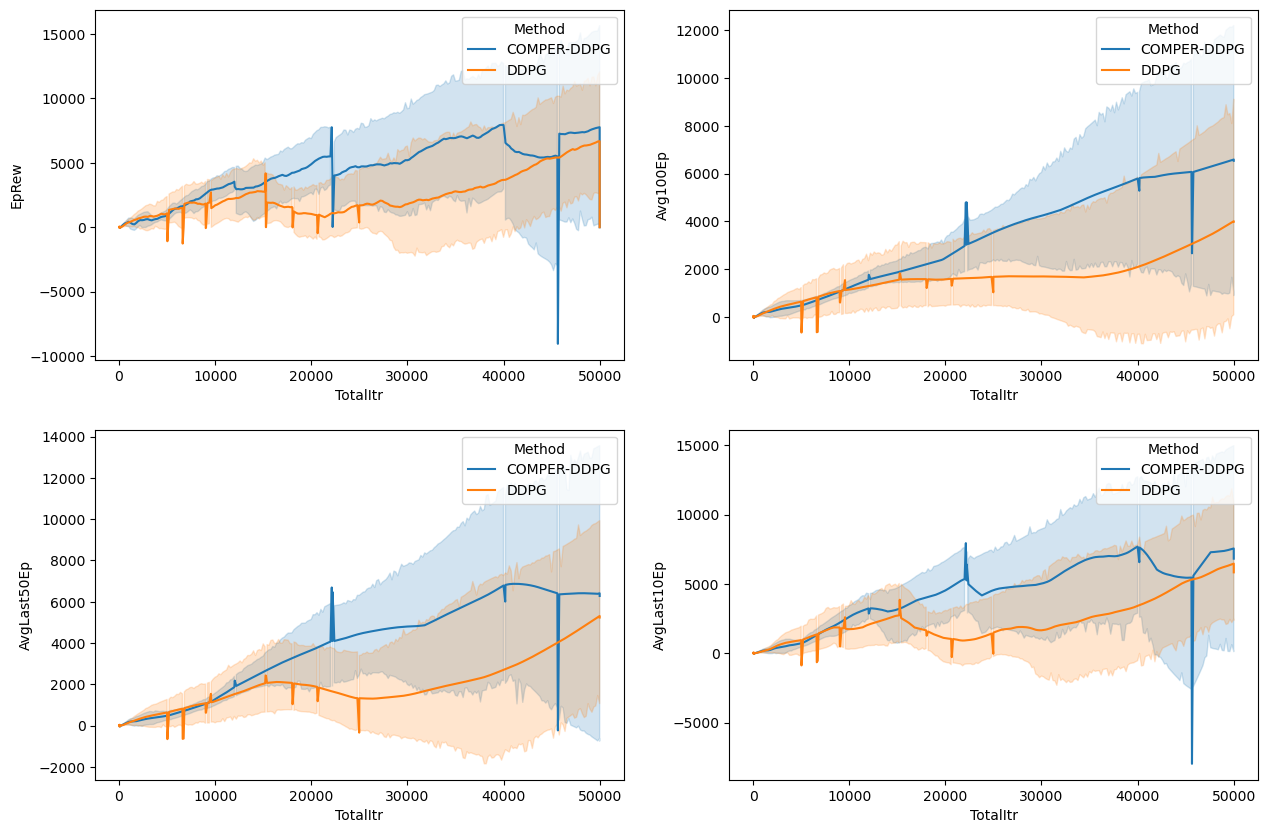

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [12]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,23-09-2023 01:33:43,Ant-v4,5000,1.752850,COMPER
1,1,23-09-2023 05:20:06,Ant-v4,10000,-2.342524,COMPER
2,1,23-09-2023 09:07:42,Ant-v4,15000,-0.613461,COMPER
3,1,23-09-2023 12:57:31,Ant-v4,20000,-1.876570,COMPER
4,1,23-09-2023 16:49:47,Ant-v4,25000,5.395422,COMPER


In [13]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,04-10-2023 04:31:06,Ant-v4,5000,5.277139,DDPG
1,1,04-10-2023 04:41:52,Ant-v4,10000,2.372543,DDPG
2,1,04-10-2023 04:53:10,Ant-v4,15000,3.385158,DDPG
3,1,04-10-2023 05:05:00,Ant-v4,20000,-14.431612,DDPG
4,1,04-10-2023 05:17:21,Ant-v4,25000,4.692071,DDPG


In [14]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])

<Axes: xlabel='Int', ylabel='EvalAvgRew'>

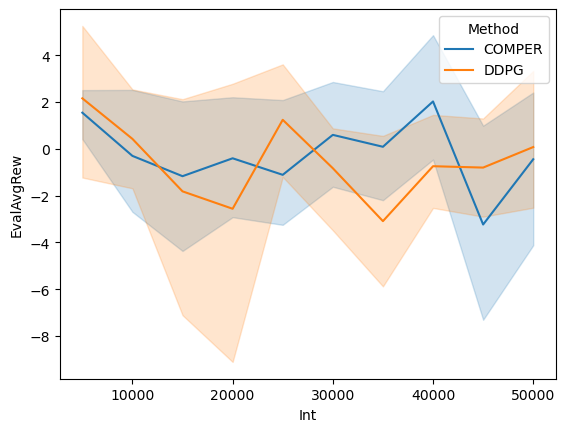

In [15]:
sns.lineplot(data=df_eval, x="Int", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [16]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,19800,3387.313510,COMPER-DDPG,2458.437169
100,20000,3453.663638,COMPER-DDPG,2493.461782
101,20200,3565.265291,COMPER-DDPG,2528.915307
102,20400,3692.094558,COMPER-DDPG,2564.203183
103,20600,3710.449898,COMPER-DDPG,2598.462893


In [17]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,19000,-432.840134,DDPG,1351.580210
100,19200,-314.803873,DDPG,1348.157861
101,19400,-257.092486,DDPG,1345.778085
102,19600,-152.589981,DDPG,1344.362901
103,19800,-96.418321,DDPG,1342.237464


In [18]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,19800,3387.313510,COMPER-DDPG,2458.437169
100,20000,3453.663638,COMPER-DDPG,2493.461782
101,20200,3565.265291,COMPER-DDPG,2528.915307
102,20400,3692.094558,COMPER-DDPG,2564.203183
103,20600,3710.449898,COMPER-DDPG,2598.462893


In [19]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
247,49400,15924.849700,DDPG,12176.089886
248,49600,15956.808984,DDPG,12240.236281
249,49800,16018.135682,DDPG,12303.338743
250,50000,15964.923563,DDPG,12364.132630
251,50001,0.371985,DDPG,12263.576825


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

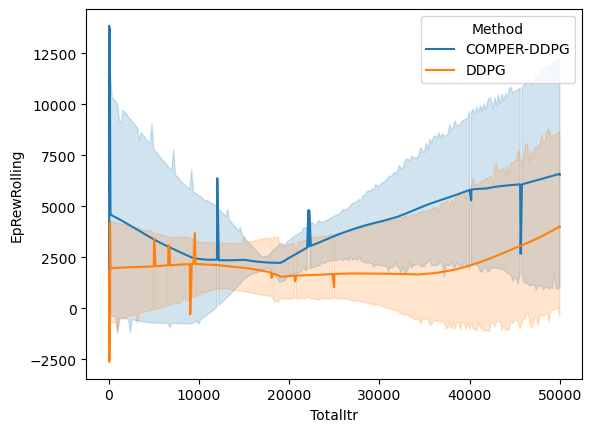

In [20]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [21]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-2.342524,COMPER,-0.294837
2,15000,-0.613461,COMPER,-1.477993
3,20000,-1.876570,COMPER,-1.245016
4,25000,5.395422,COMPER,1.759426
5,30000,3.628445,COMPER,4.511934


In [22]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.372543,DDPG,3.824841
2,15000,3.385158,DDPG,2.878850
3,20000,-14.431612,DDPG,-5.523227
4,25000,4.692071,DDPG,-4.869771
5,30000,0.442683,DDPG,2.567377


In [23]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])

<Axes: xlabel='Int', ylabel='EpRewRolling'>

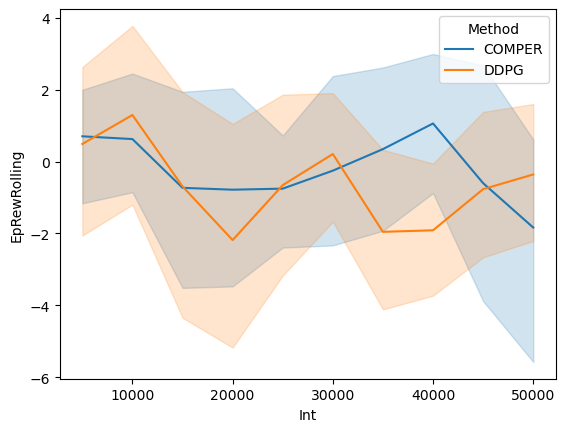

In [24]:
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

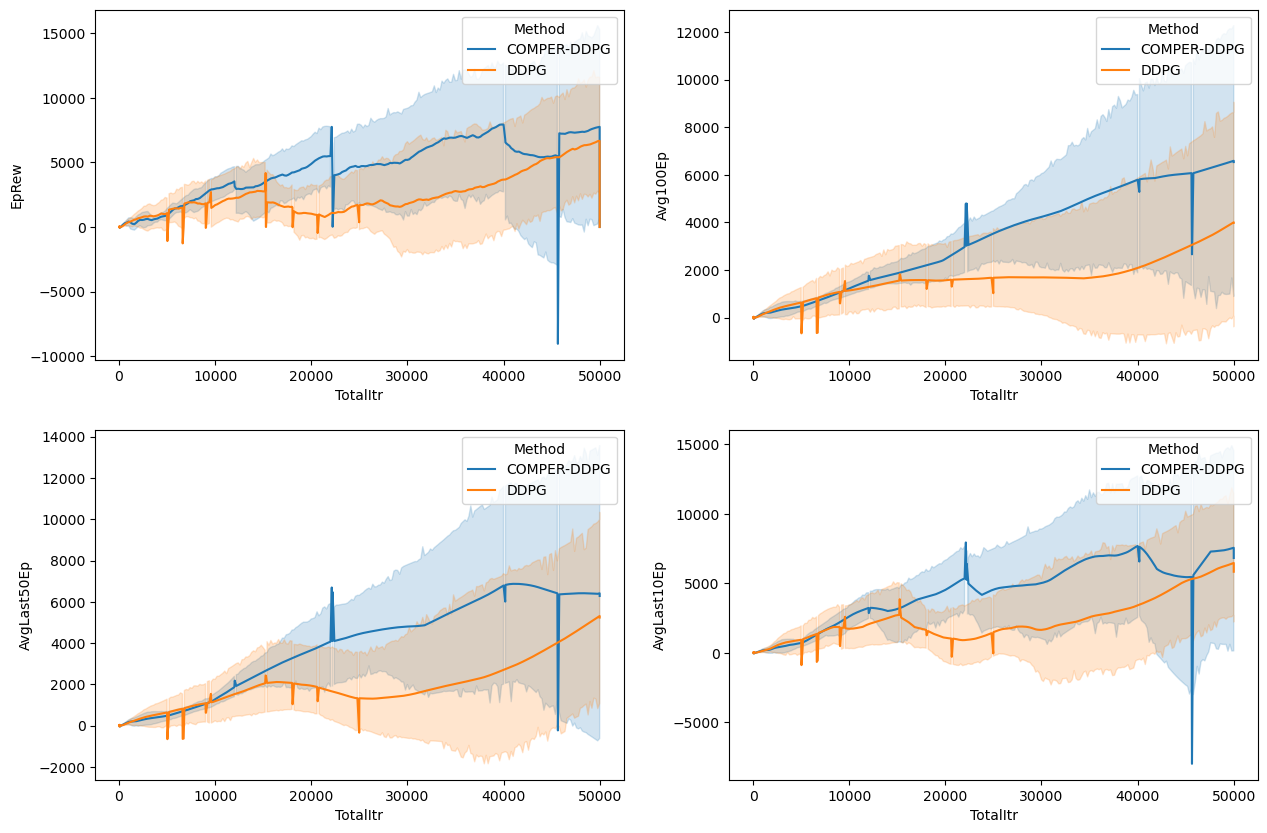

In [25]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

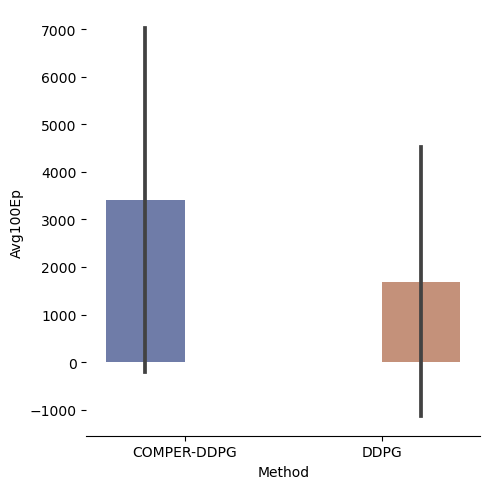

In [36]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)

g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)


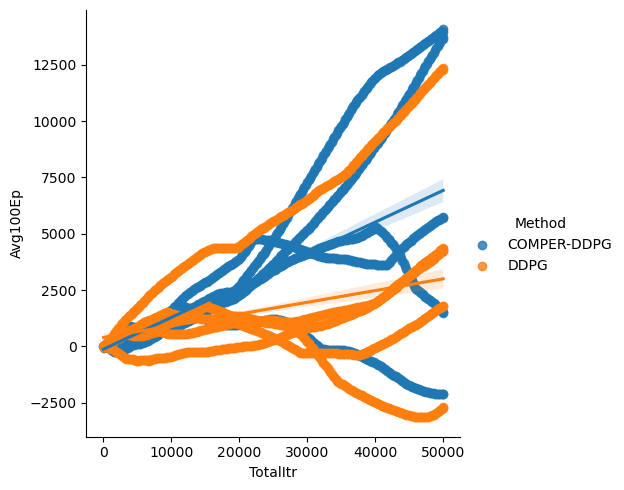

In [39]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)